In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import math
import cv2
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import re

sys.path.append(os.getcwd()+'\\..\\scripts\\')

# from MNGFeaturesRegions import MNGFeaturesRegions
# from MNGFeaturesMeans import MNGFeaturesMeans
# from MNGFeaturesGradient import MNGFeaturesGradient
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
plt.rcParams.update({'font.size': 45})
plt.rcParams['figure.figsize'] = [25, 15]

# graphs

In [3]:
def fold_graph(lit, rf, att, metric):
    plt.plot(lit.iloc[:-1]['MLR'], 'rs', markersize=20)
    plt.plot(rf.iloc[:-1]['RF100'], 'bx', markersize=40)

    plt.xticks(np.arange(5), ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
    plt.xlabel('Folds')
    plt.ylabel(metric)
    plt.legend(['Literatura', 'Abordagem proposta'])
    plt.savefig('../plots/article/fold_%s_%s.png' % (metric, att), bbox_inches = 'tight', pad_inches = 0)

In [4]:
def dispersion_graph(data, att, var):
#     slope, intercept, r_value, p_value, std_err = stats.linregress(data[att+'_predict'], data[att+'_real'])
    ax = sns.regplot(data[att+'_predict'], data[att+'_real'])
    ax.set(xlabel='Predicted', ylabel='Real', ylim=(0,None))
    ax.get_figure().savefig('../plots/article/scatter_%s_%s.png' % (att, var), bbox_inches = 'tight', pad_inches = 0)

# results for each subgroup

In [13]:
r = pd.read_csv('../results_r.csv', index_col=0)
rmse = pd.read_csv('../results_rmse.csv', index_col=0)

inds = r.index.values[:-1]

new_indexes = [re.search('(.*)[(].*[)]', ind).group(1).strip() for ind in inds]
new_indexes.append(r.index.values[-1])

new_indexes = ['G'+ind[1:] for ind in new_indexes[:-1]]
new_indexes.append('Subgroup')

r.reset_index(inplace=True)
r.index = new_indexes
rmse.reset_index(inplace=True)
rmse.index = new_indexes

In [15]:
rmse['RF'].sort_values(ascending=False)

G2          48.861500
G4          38.191900
G7          37.875100
G1          37.799500
G10         31.531700
G5          13.717700
G9          13.715400
G8          13.294200
G3          11.578400
G6          10.452500
Subgroup     7.760113
Name: RF, dtype: float64

In [62]:
# r = r2
# r['MLR'] = r['MLR'].apply(lambda x: math.sqrt(x))
# r['RF'] = r['RF'].apply(lambda x: math.sqrt(x))

No handles with labels found to put in legend.


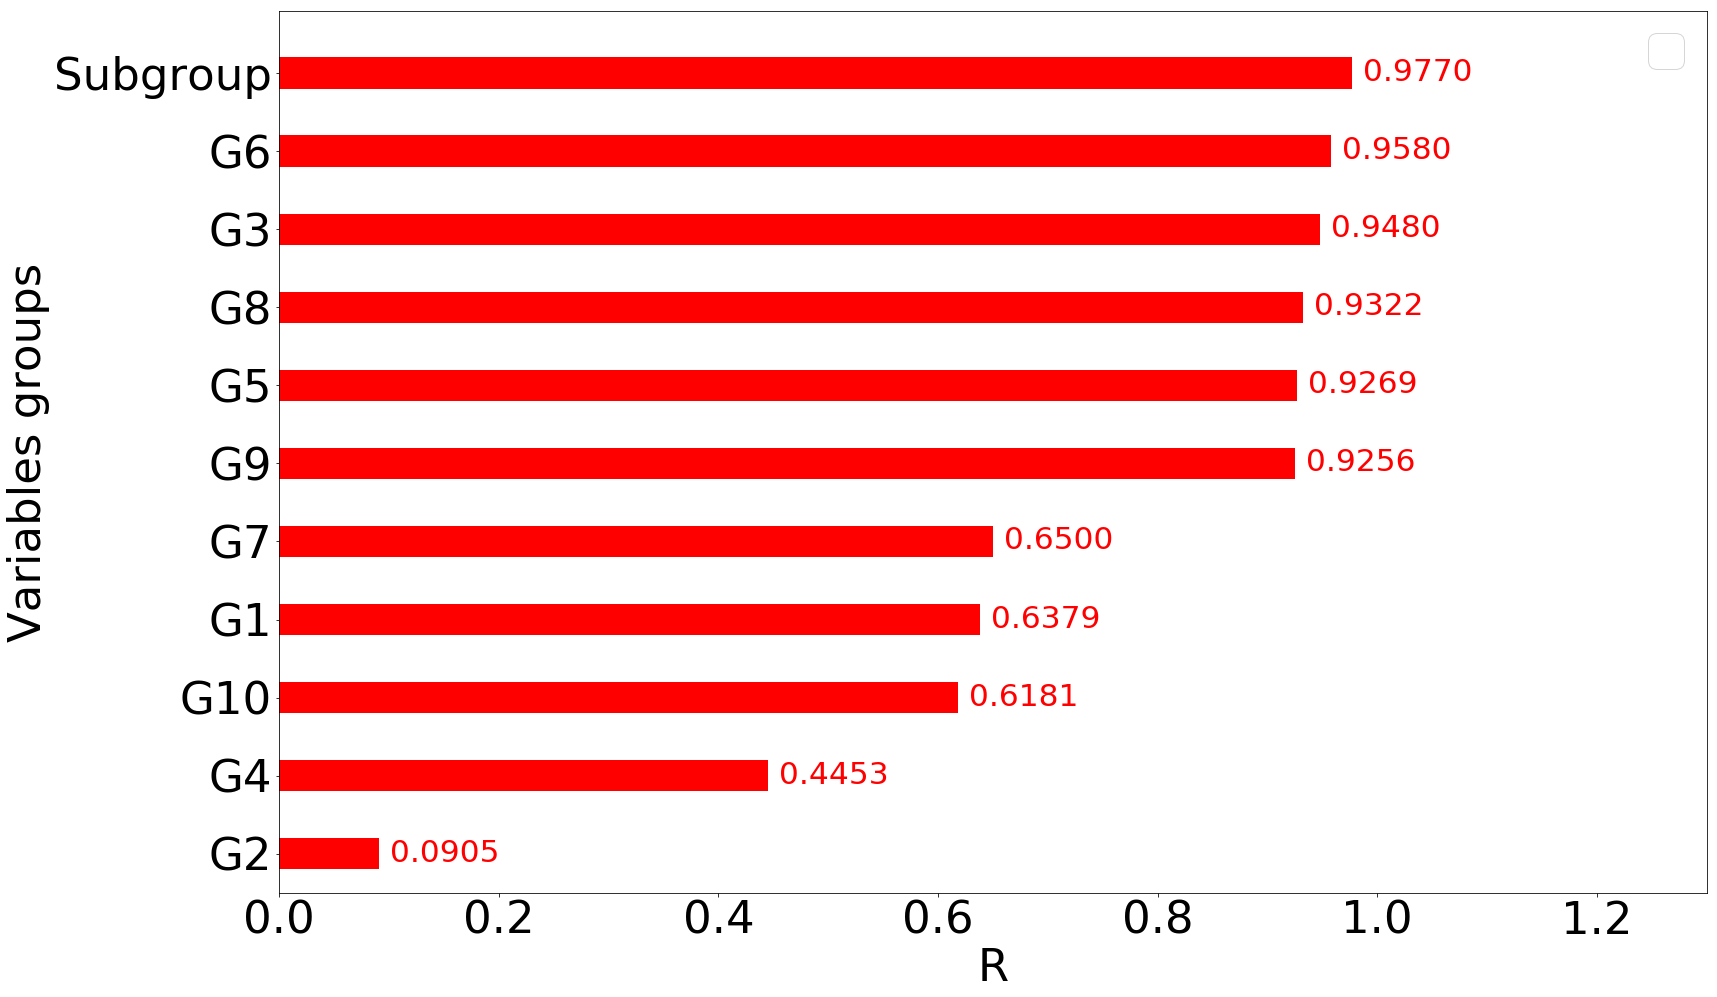

In [5]:
fig, ax = plt.subplots()

# r1 = plt.barh(np.arange(11)-0.2, r['MLR'].sort_values(), height=0.4, color='b', label='LR')
r2 = plt.barh(np.arange(11), r['RF'].sort_values(), height=0.4, color='r')

plt.yticks(np.arange(11), r.sort_values(by=['RF']).index.values)
# plt.title('R values')
plt.xlabel('R')
plt.ylabel('Variables groups')
plt.ylim([-0.5, 10.8])
plt.xlim([-0, 1.3])

plt.legend()
plt.tight_layout()

for i, v in enumerate(r['RF'].sort_values()):
#     ax.text(v+0.01, i+0.07, str("{:.4f}".format(v)), color='red', fontsize='x-small')
    ax.text(v+0.01, i-0.1, str("{:.4f}".format(v)), color='red', fontsize='x-small')

# for i, v in enumerate(r['MLR'].sort_values()):
#     ax.text(v+0.01, i-0.35, str("{:.4f}".format(v)), color='blue', fontsize='x-small')
    
desc =  'G1-G10: Variables subgroups \n' \
        'All: All variables'

# ax.text(1.09, 0.01, desc, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))
# plt.savefig('../plots/article/results_R.png', bbox_inches = 'tight', pad_inches = 0)
plt.savefig('../plots/article/results_R_subgroup.png', bbox_inches = 'tight', pad_inches = 0)

No handles with labels found to put in legend.


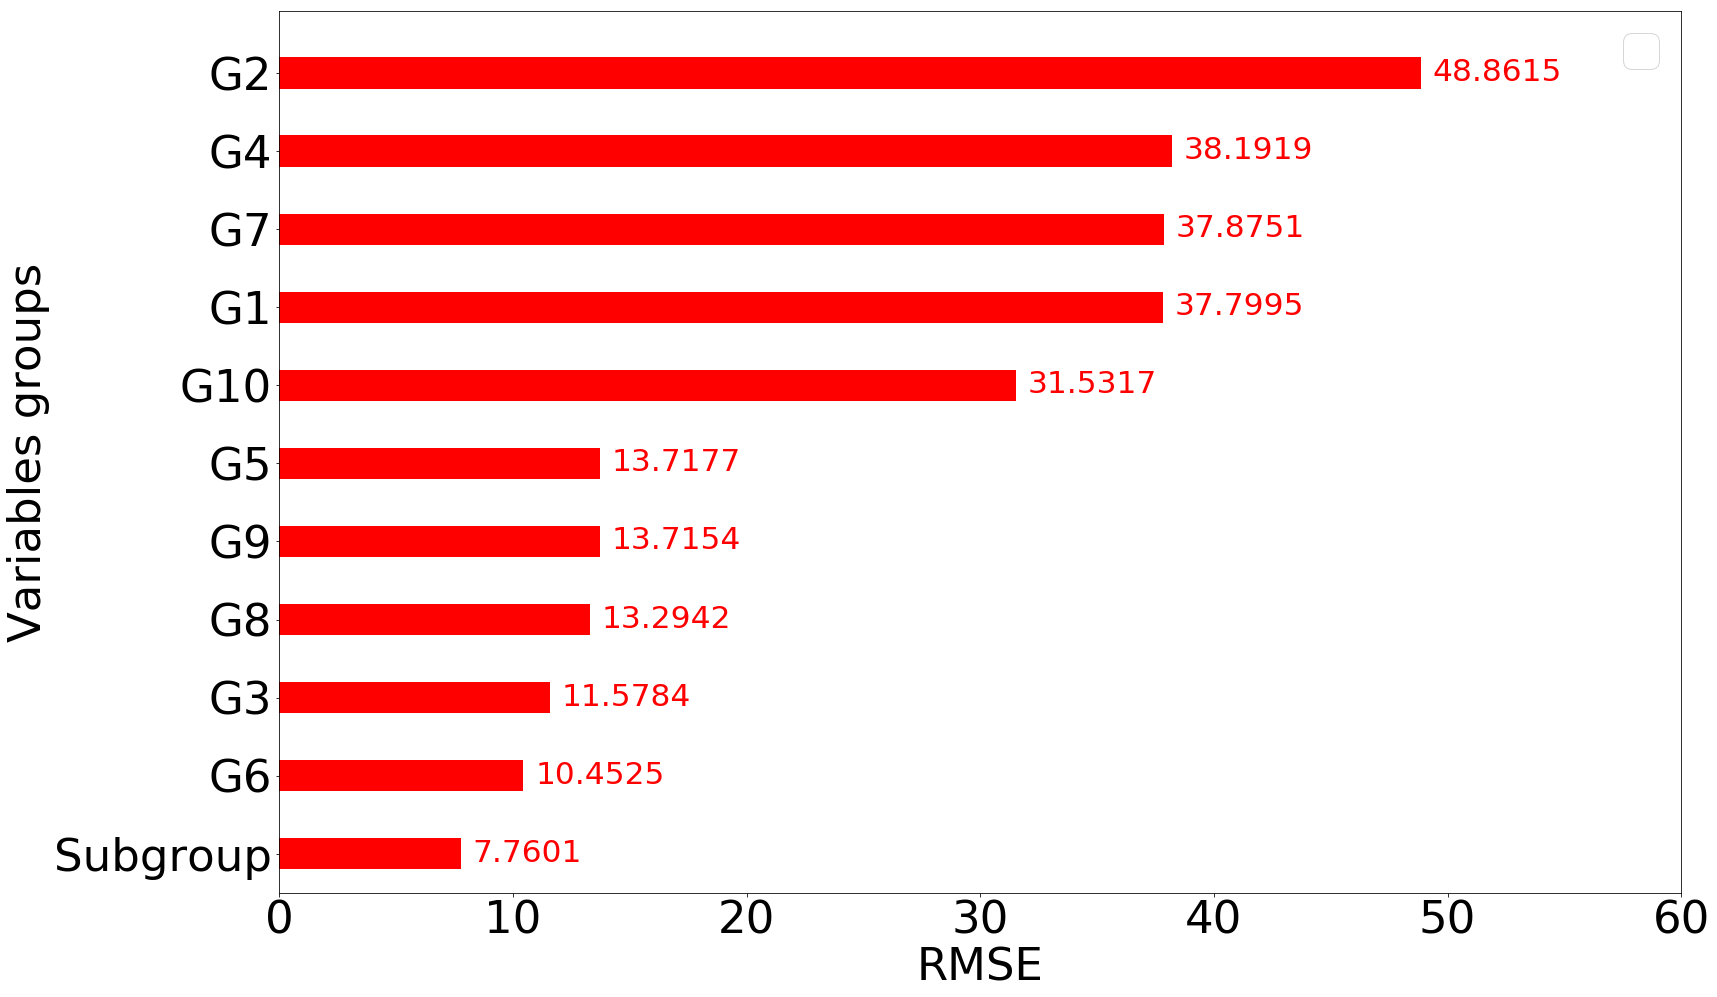

In [6]:
fig, ax = plt.subplots()

# r1 = plt.barh(np.arange(11)-0.2, rmse['MLR'].sort_values(), height=0.4, color='b', label='LR')
r2 = plt.barh(np.arange(11), rmse['RF'].sort_values(), height=0.4, color='r')

plt.yticks(np.arange(11), rmse.sort_values(by=['RF']).index.values)
plt.xlabel('RMSE')
plt.ylabel('Variables groups')
plt.ylim([-0.5, 10.8])
plt.xlim([-0, 60])

plt.legend()
plt.tight_layout()

for i, v in enumerate(rmse['RF'].sort_values()):
    ax.text(v+0.5, i-0.1, str("{:.4f}".format(v)), color='red', fontsize='x-small')
    
# for i, v in enumerate(rmse['MLR'].sort_values()):
#     ax.text(v+0.5, i-0.35, str("{:.4f}".format(v)), color='blue', fontsize='x-small')
    
desc =  'G1-G10: Variables subgroups \n' \
        'All: All variables'
# ax.text(1.09, 0.01, desc, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))
# plt.savefig('../plots/article/results_RMSE.png', bbox_inches = 'tight', pad_inches = 0)
plt.savefig('../plots/article/results_rmse_subgroup.png', bbox_inches = 'tight', pad_inches = 0)

# sample x variables data (all variables)

In [5]:
data_path = os.getcwd()+'/../resampling/all_data_repeated.csv'
old_data = pd.read_csv(data_path, sep=',', index_col=0)

to_be_deleted = [234, 385, 248, 110, 378, 159, 131, 252, 9, 53, 46, 153, 307, 203, 414, 412, 438, 20, 208, 188, \
                 357, 315, 246, 219, 235, 456, 261, 51, 339, 415, 67, 373, 52, 335, 201, 95, 129, 200, 364, 81, \
                 172, 291, 64, 367, 71, 255, 263, 40, 268, 165, 313, 316, 416, 404, 167, 238, 475, 32, 202, 345, \
                 294, 139, 324, 83, 15, 86, 254, 419, 477, 447, 207, 94, 318, 329, 249, 250, 85, 186, 361, 170, \
                 270, 100, 421, 258, 96, 69, 397, 451, 22, 181, 17, 59, 467, 215, 128, 230, 93, 286, 461, 337, \
                 468, 18, 271, 214, 391, 383, 82, 325, 228, 442, 274, 231, 122, 426, 401, 141, 143, 244, 192, 77]

# ATTENTION! I'M ASSIGNING IT MANUALLY, NOT BASED IN INDEX
resampled_data = old_data.iloc[-480:]
rows_to_delete = resampled_data.iloc[to_be_deleted]

data = old_data.drop(rows_to_delete.index.values)

# remove atributos diff
data = data.drop(columns=data.columns.values[:1710])

n_var_names = list(filter(lambda x: 'region' in x, data.columns.values))
data = data.drop(columns=n_var_names)

data.drop(columns=['height', 'width'], inplace=True)

# predicted atts for all variables

In [5]:
pred = pd.read_csv(os.getcwd()+'/../predictions/dados_predict_reais(all-novo_repetição).csv', sep=';', index_col=0)

In [6]:
pred = pd.read_csv(os.getcwd()+'/../predictions/dados_predict_reais_8_best_variables.csv', sep=';', index_col=0)

In [41]:
pred = pd.read_csv(os.getcwd()+'/../predictions/dados_predict_reais_subgroup.csv', sep=';', index_col=0)

# variables importances

In [65]:
att = 'time'

In [66]:
rf_model = RandomForestRegressor(n_estimators=100).fit(data.drop(columns=['sst','firmeza', 'acidez', 'ratio', \
                                                                          'massa', 'time']), data[att])

In [67]:
variables = pd.DataFrame(columns=['variable', 'importance'])
cols = list(filter(lambda x: x not in ['sst','massa','firmeza','time','ratio','acidez'], data.columns.values))
variables['variable'] = cols

variables['importance'] = rf_model.feature_importances_.tolist()
dt = variables[variables['importance'].apply(lambda x: x > 0.01)]

In [73]:
legend = ['V'+str(n) for n in np.arange(1,dt.shape[0]+1)]

In [80]:
desc = 'V1: RB rate \n V2: RG difference \n V3: Number of pixels \n V4: Correlation dimension \n V5: Diameter'\
        'V6: Equatorial B mean \n V7: Blue mean \n V8: a* mean'

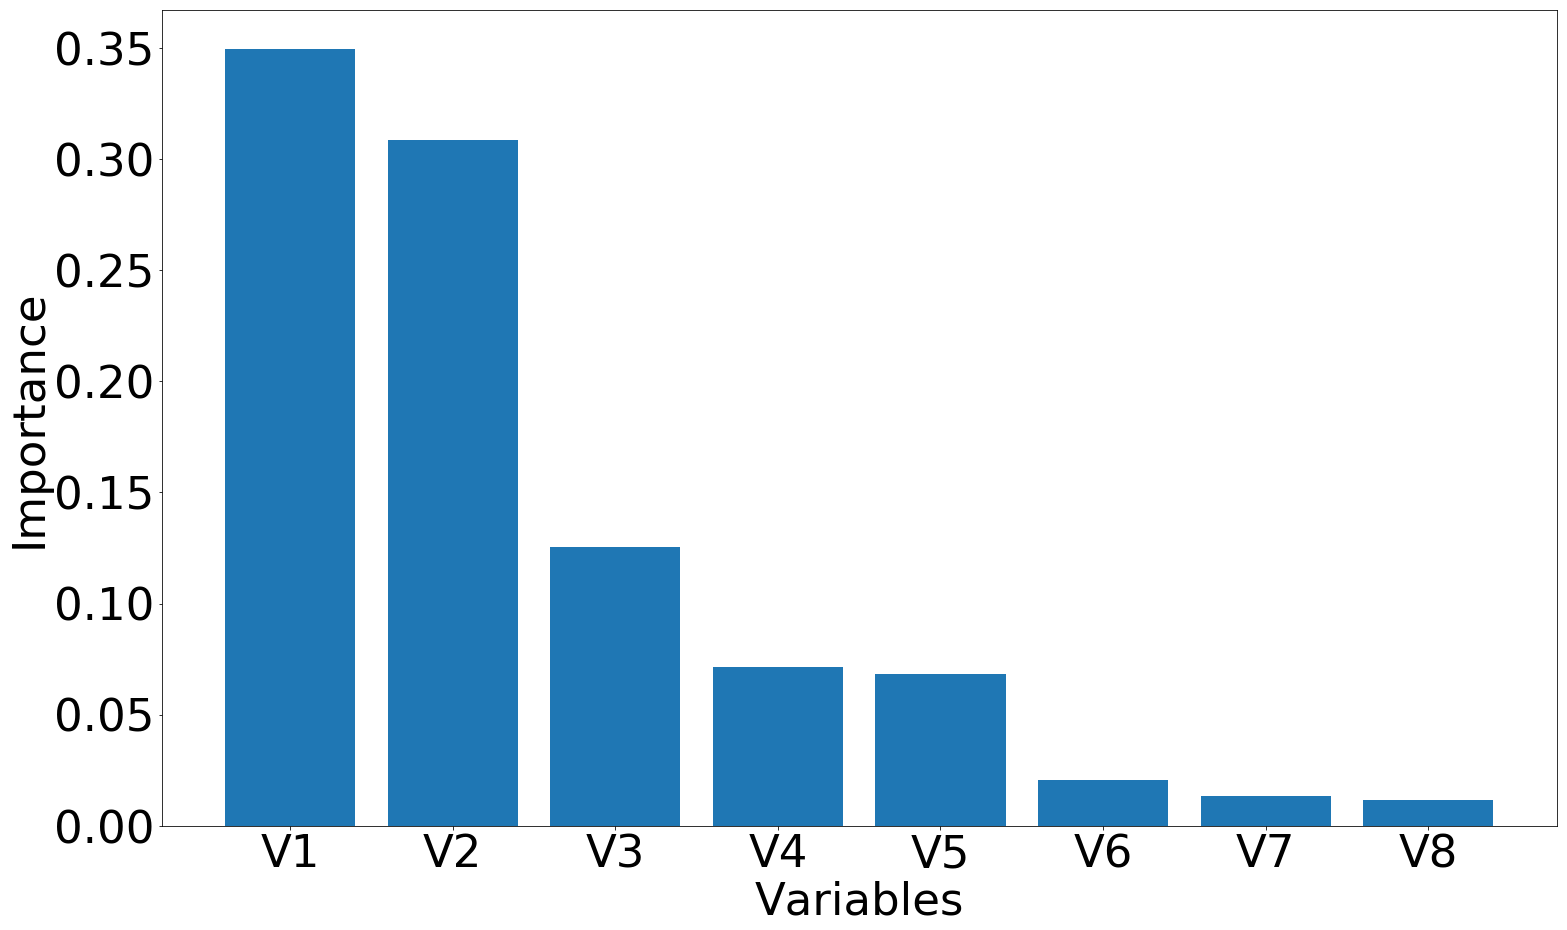

In [95]:
plt.bar(np.arange(dt.shape[0]), dt.sort_values(by='importance', ascending=False)['importance'])
plt.xticks(np.arange(dt.shape[0]), dt.sort_values(by='importance', ascending=False)['variable'])
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.xticks(np.arange(0, dt.shape[0]), legend)
plt.savefig('../plots/article/importancia_'+att+'.png', bbox_inches = 'tight', pad_inches = 0)

# weight prediction (number of pixels (LR) x best variables (RF))

In [37]:
lit_r2 = pd.read_csv('../results/literatura_massa_r2.csv', index_col=0)
lit_rmse = pd.read_csv('../results/literatura_massa_rmse.csv', index_col=0)

rf_r2 = pd.read_csv('../results/rfbestvar_massa_r2.csv', index_col=0)
rf_rmse = pd.read_csv('../results/rfbestvar_massa_rmse.csv', index_col=0)

In [38]:
lit_r2['MLR'] = lit_r2['MLR'].apply(lambda x: math.sqrt(x))
rf_r2['RF100'] = rf_r2['RF100'].apply(lambda x: math.sqrt(x))

<span style="font-size:15px">R values by fold</span>

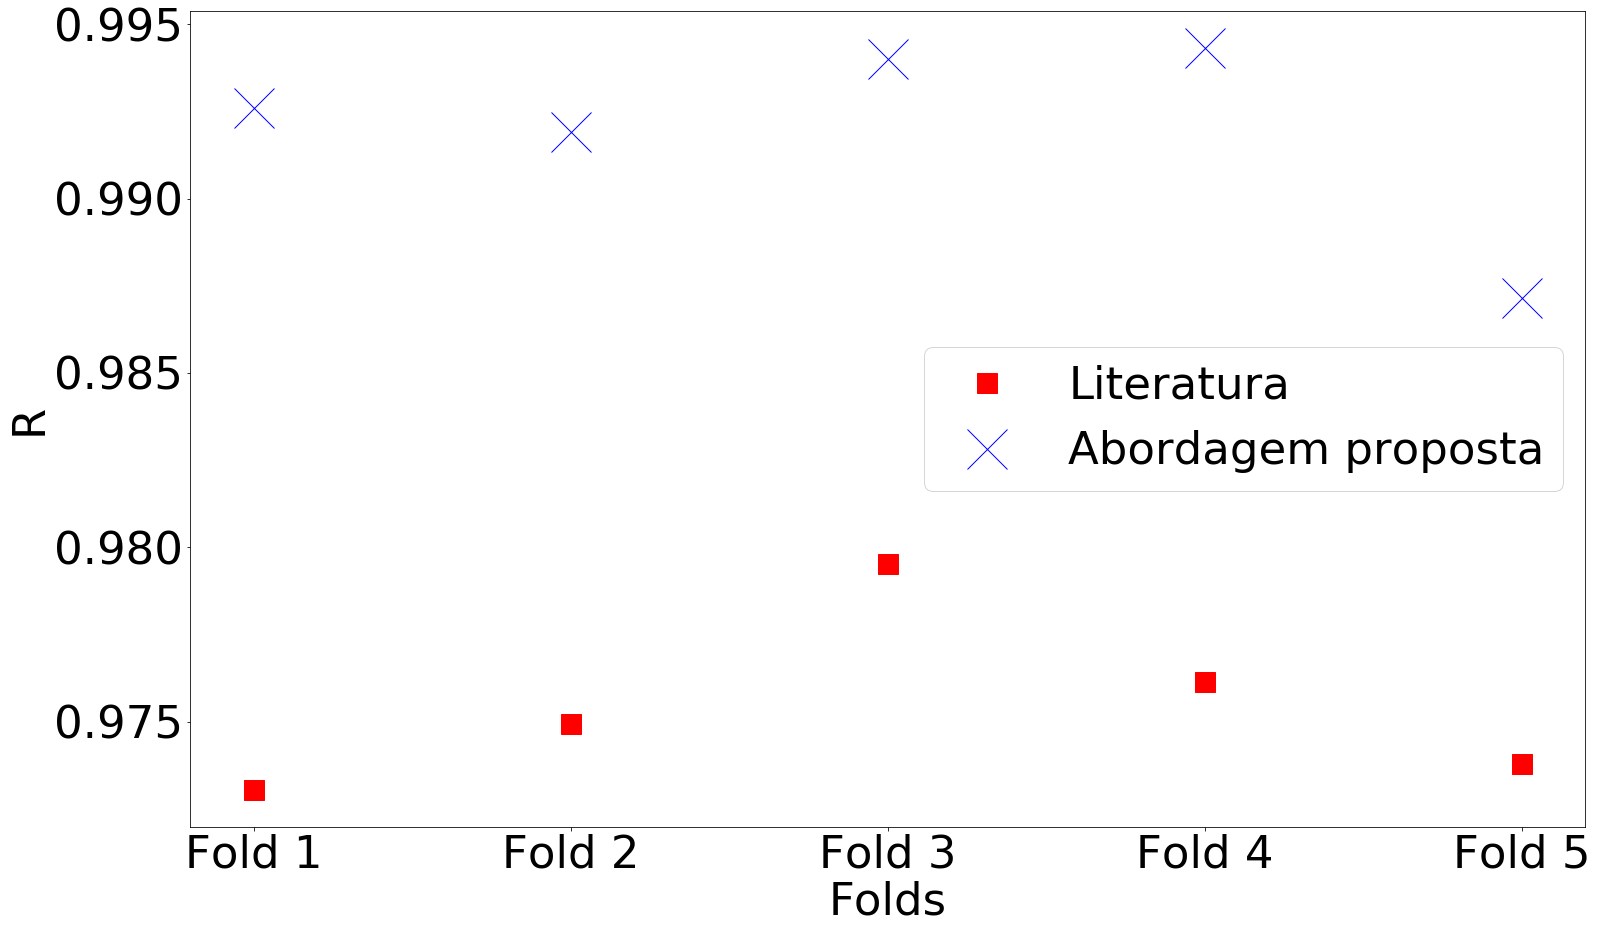

In [39]:
fold_graph(lit_r2, rf_r2, 'massa', 'R')

<span style="font-size:15px">RMSE values by fold</span>

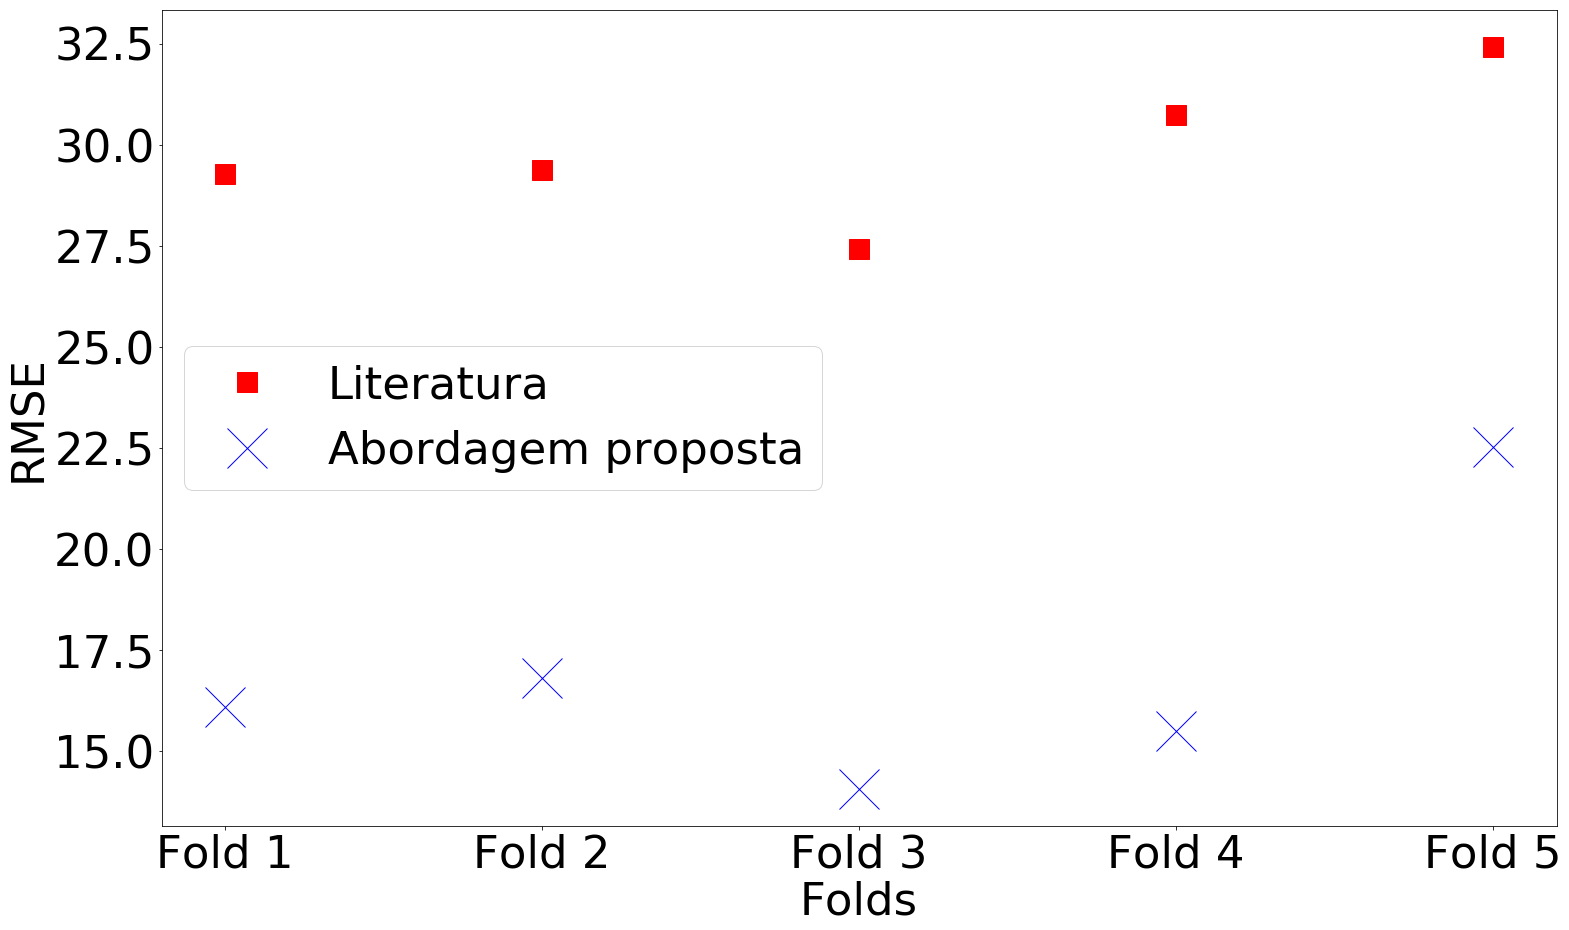

In [40]:
fold_graph(lit_rmse, rf_rmse, 'massa', 'RMSE')

<span style="font-size:20px">Dispersion graphs</span>

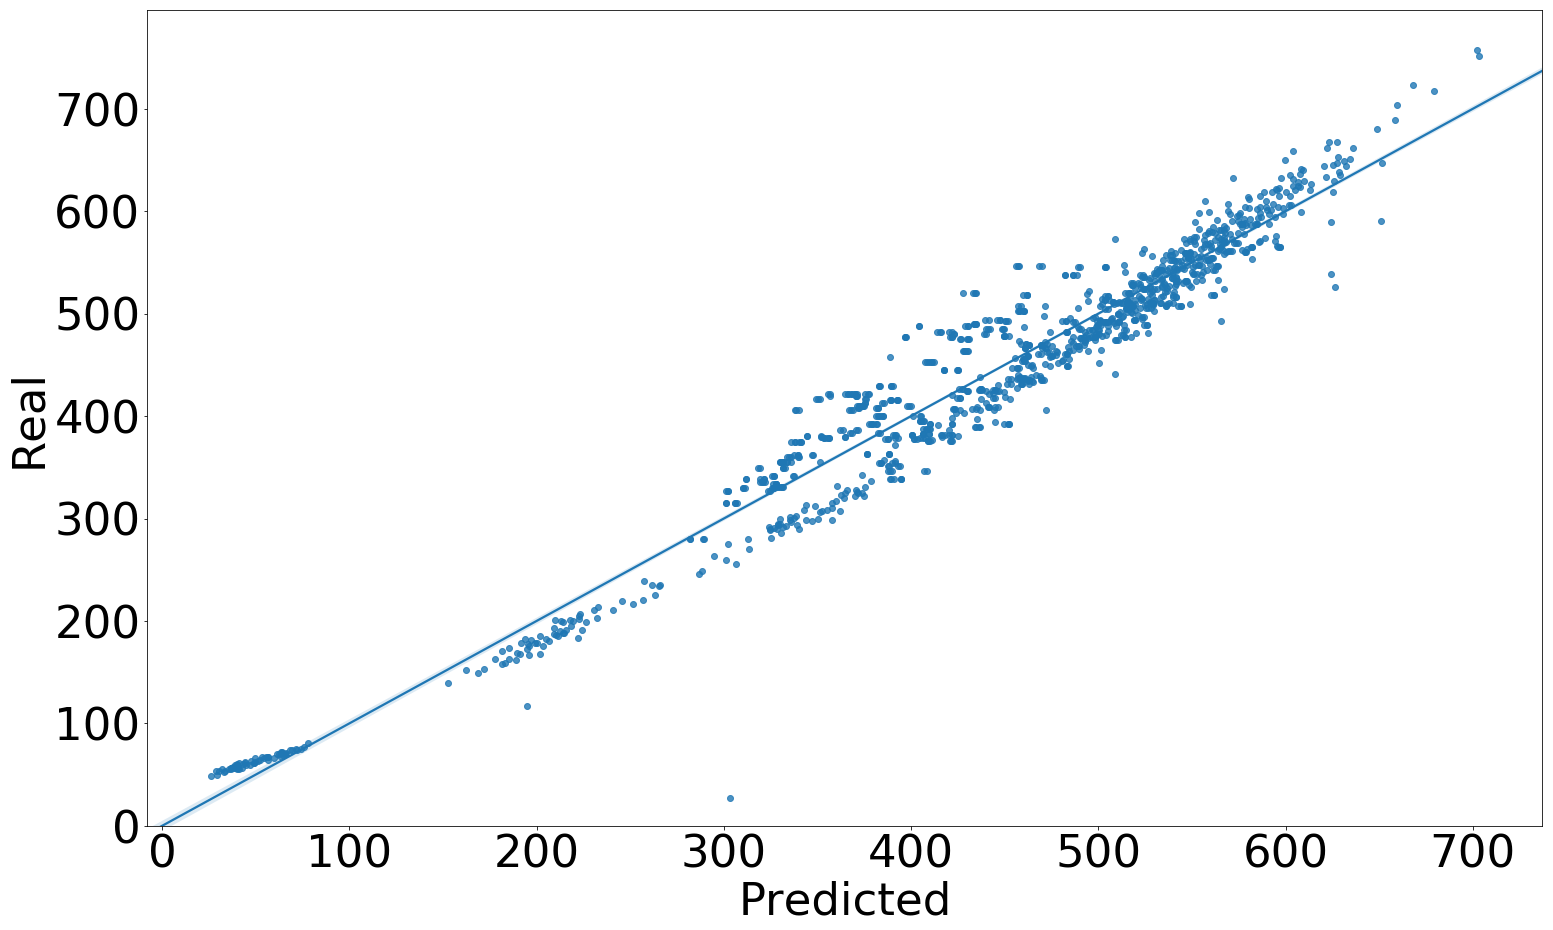

In [32]:
area_pred = pd.read_csv('../predictions/dados_predict_reais_area_only.csv', index_col=0, sep=';')
dispersion_graph(area_pred, 'massa', 'npixels')

/home/danielesreis/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


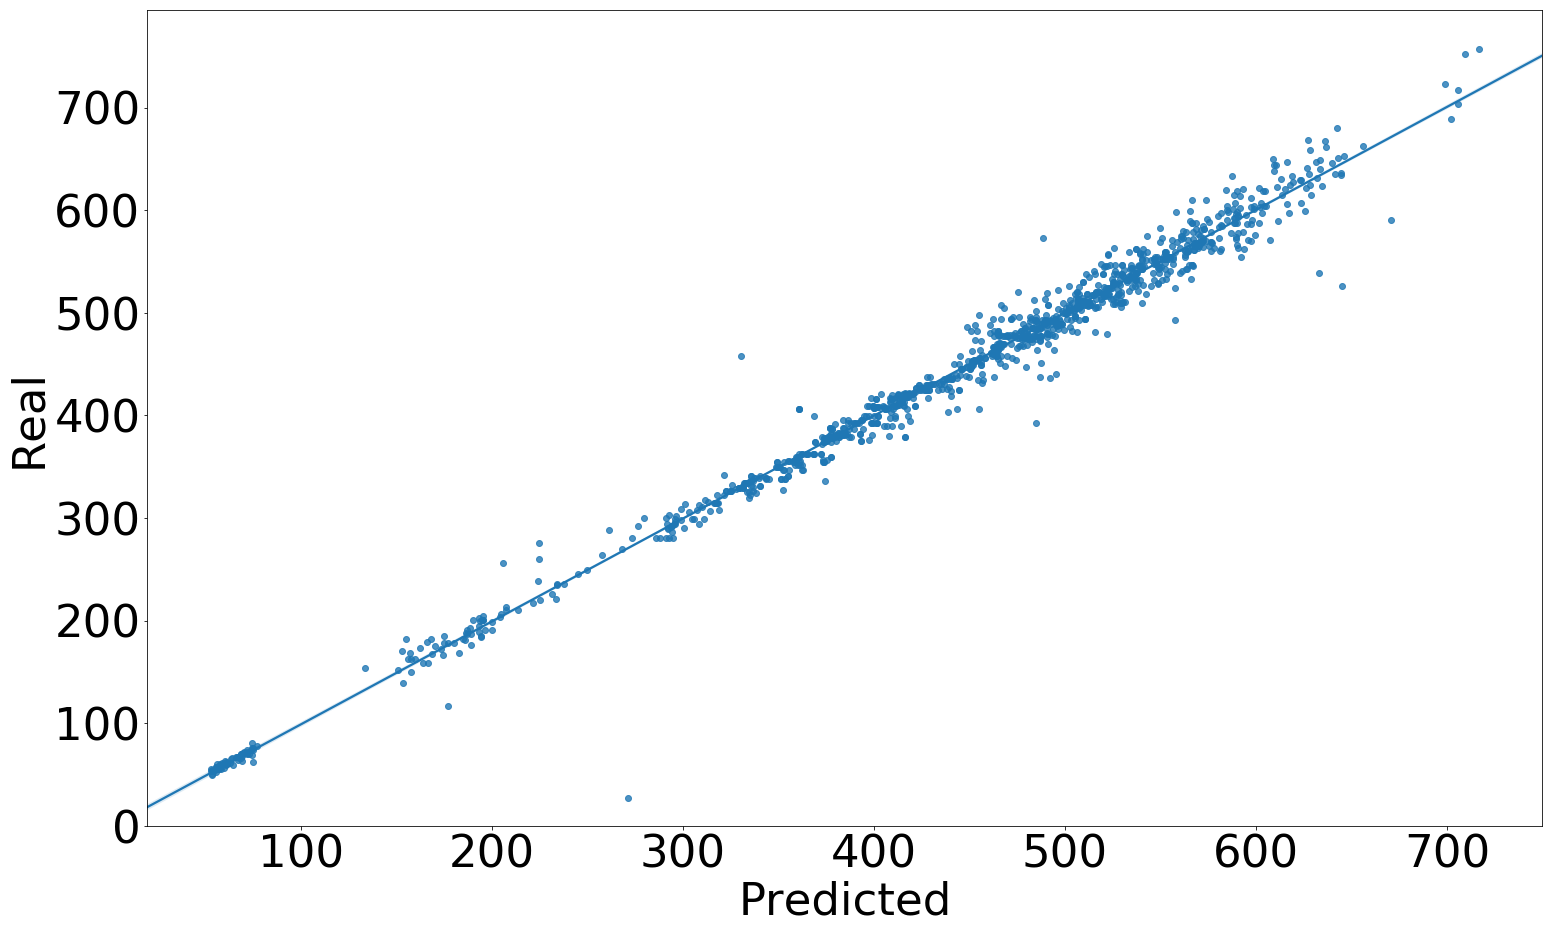

In [42]:
dispersion_graph(pred, 'massa', 'subgroup')

# sst prediction (H mean (LR) x subgroup (RF))

In [43]:
lit_r2 = pd.read_csv('../results/literatura_sst_r2.csv', index_col=0)
lit_rmse = pd.read_csv('../results/literatura_sst_rmse.csv', index_col=0)

rf_r2 = pd.read_csv('../results/rfbestvar_sst_r2.csv', index_col=0)
rf_rmse = pd.read_csv('../results/rfbestvar_sst_rmse.csv', index_col=0)

In [44]:
lit_r2['MLR'] = lit_r2['MLR'].apply(lambda x: math.sqrt(abs(x)))
rf_r2['RF100'] = rf_r2['RF100'].apply(lambda x: math.sqrt(abs(x)))

<span style="font-size:20px">R values by fold</span>

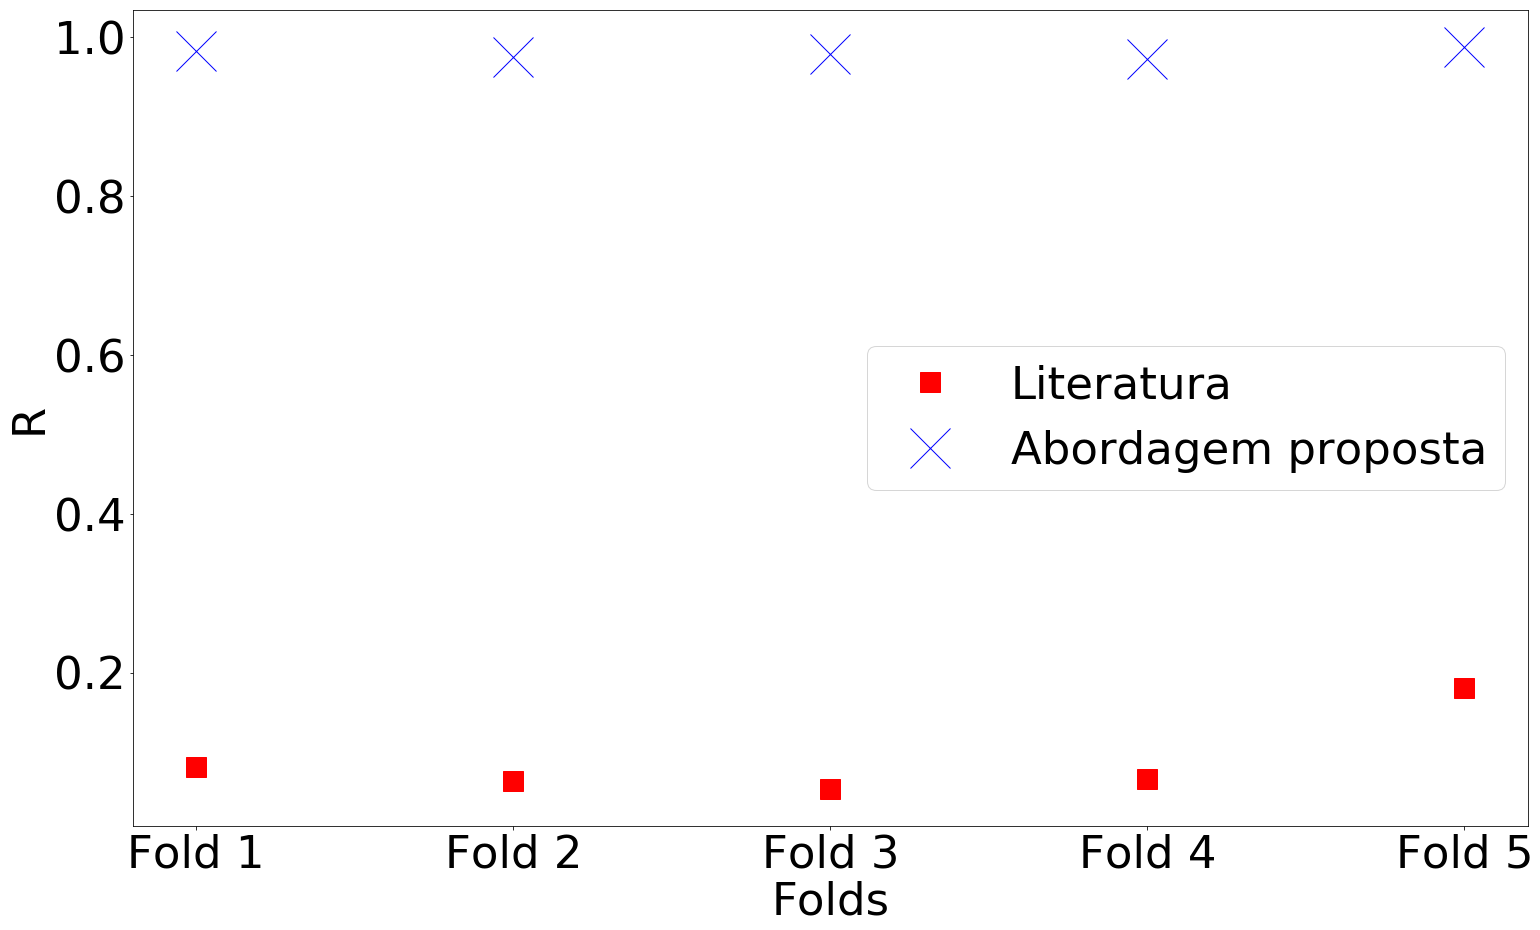

In [45]:
fold_graph(lit_r2, rf_r2, 'sst', 'R')

<span style="font-size:20px">RMSE values by fold</span>

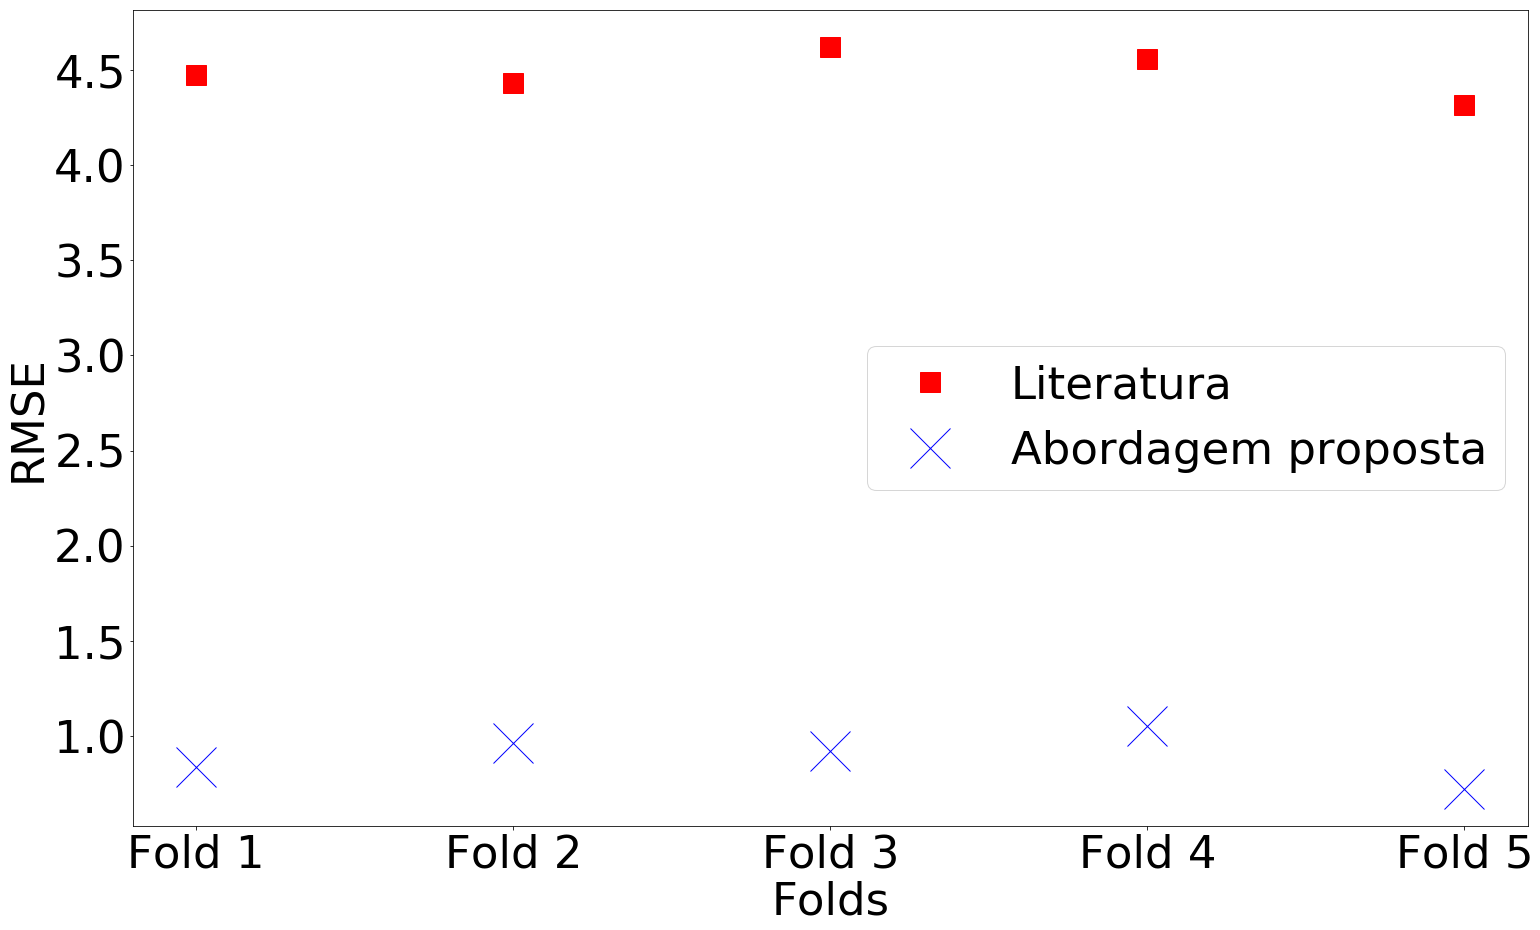

In [46]:
fold_graph(lit_rmse, rf_rmse, 'sst', 'RMSE')

<span style="font-size:20px">Dispersion graphs</span>

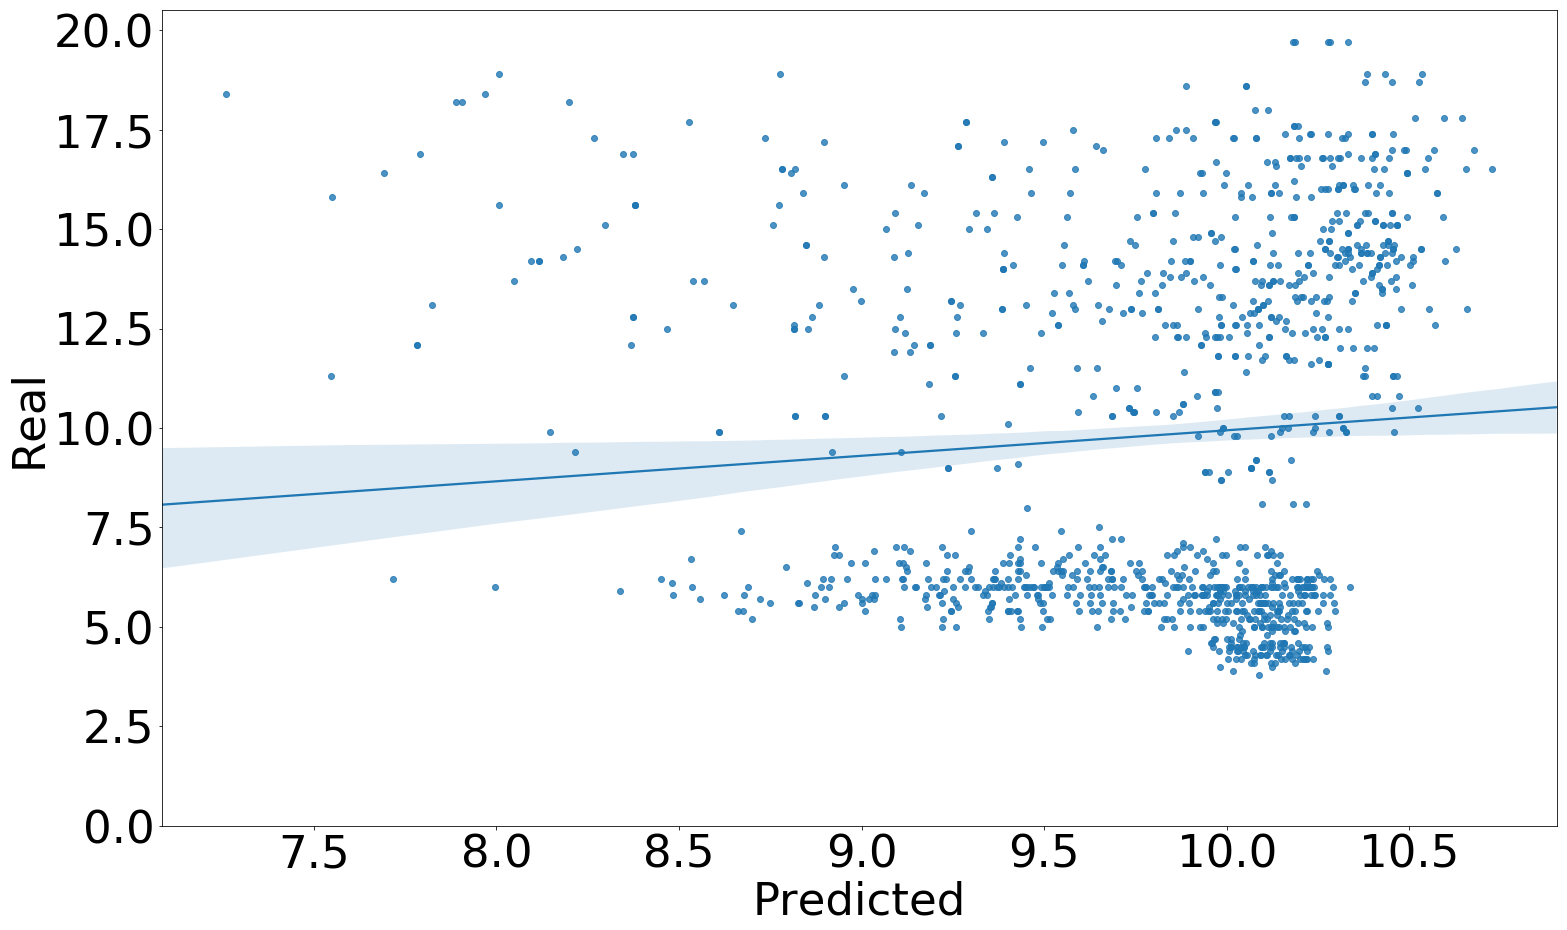

In [52]:
hue_pred = pd.read_csv('../predictions/dados_predict_reais_H_mean.csv', index_col=0, sep=';')
dispersion_graph(hue_pred, 'sst', 'Hmean')

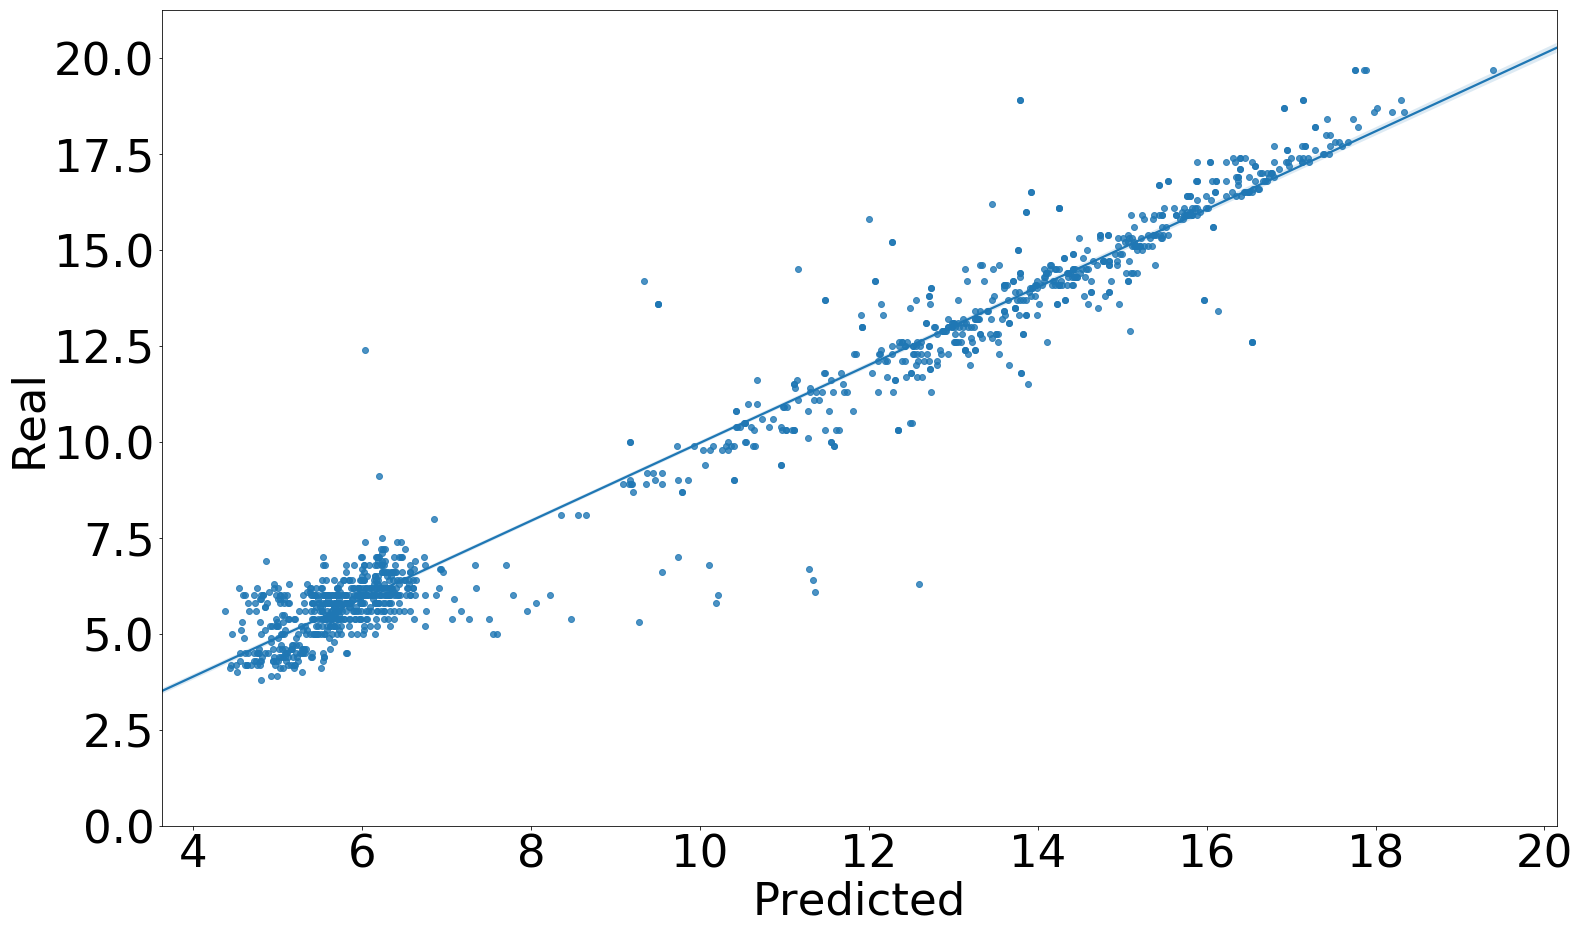

In [47]:
dispersion_graph(pred, 'sst', 'subgroup')

# firmness prediction (L mean (LR) x subgroup (RF)

In [48]:
lit_r2 = pd.read_csv('../results/literatura_firmeza_r2.csv', index_col=0)
lit_rmse = pd.read_csv('../results/literatura_firmeza_rmse.csv', index_col=0)

rf_r2 = pd.read_csv('../results/rfbestvar_firmeza_r2.csv', index_col=0)
rf_rmse = pd.read_csv('../results/rfbestvar_firmeza_rmse.csv', index_col=0)

In [51]:
lit_r2['MLR'] = lit_r2['MLR'].apply(lambda x: math.sqrt(abs(x)))
rf_r2['RF100'] = rf_r2['RF100'].apply(lambda x: math.sqrt(x))

<span style="font-size:20px">R values by fold</span>

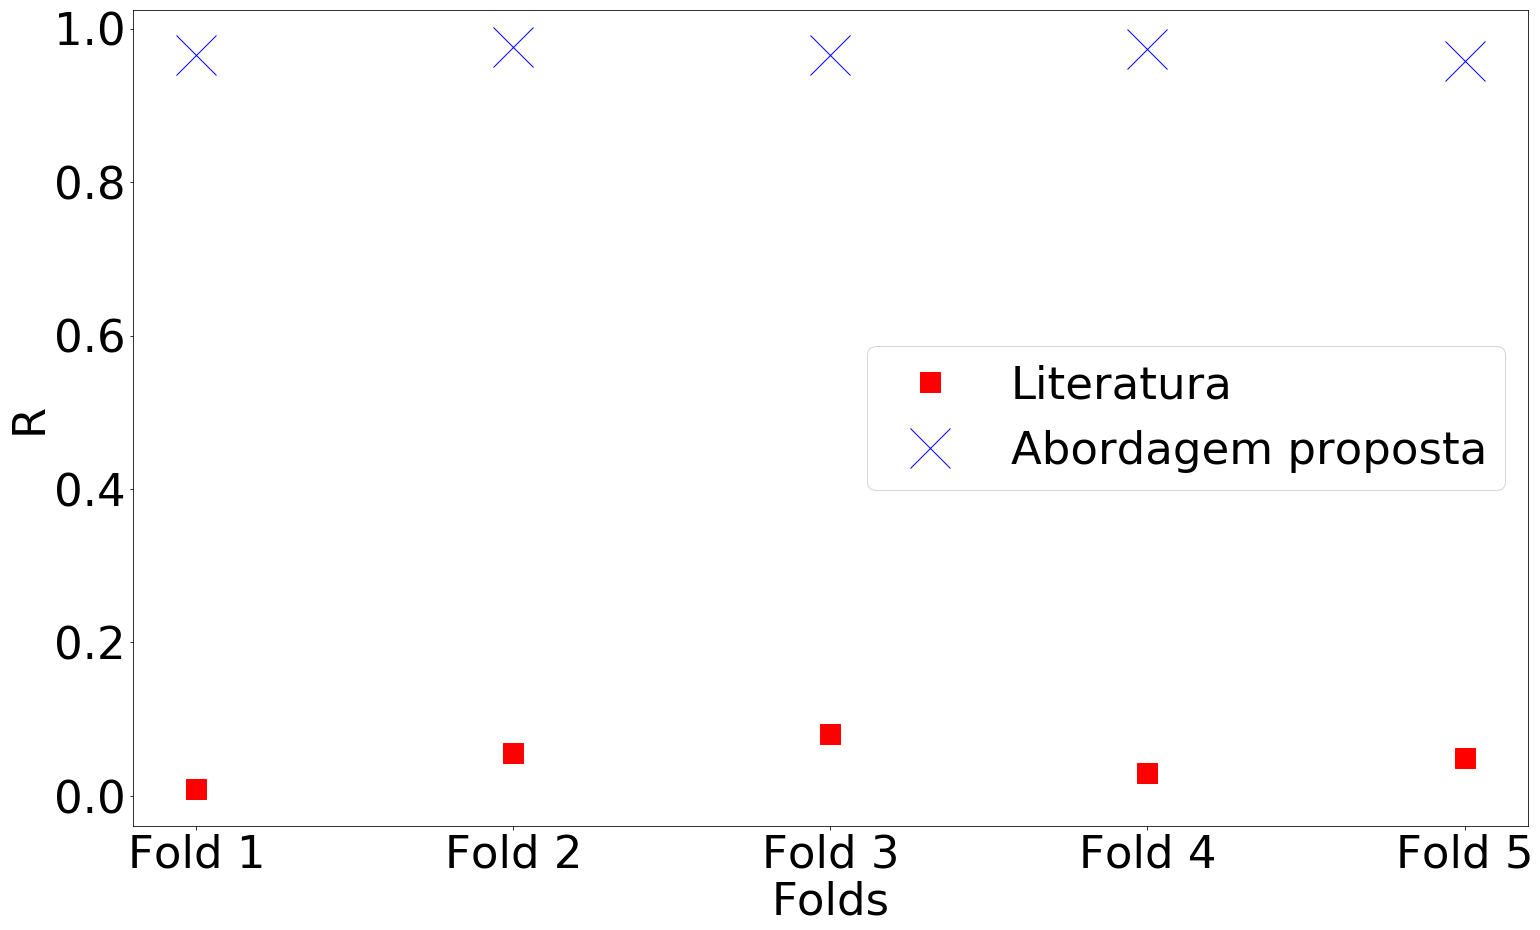

In [52]:
fold_graph(lit_r2, rf_r2, 'firmeza', 'R')

<span style="font-size:20px">RMSE values by fold</span>

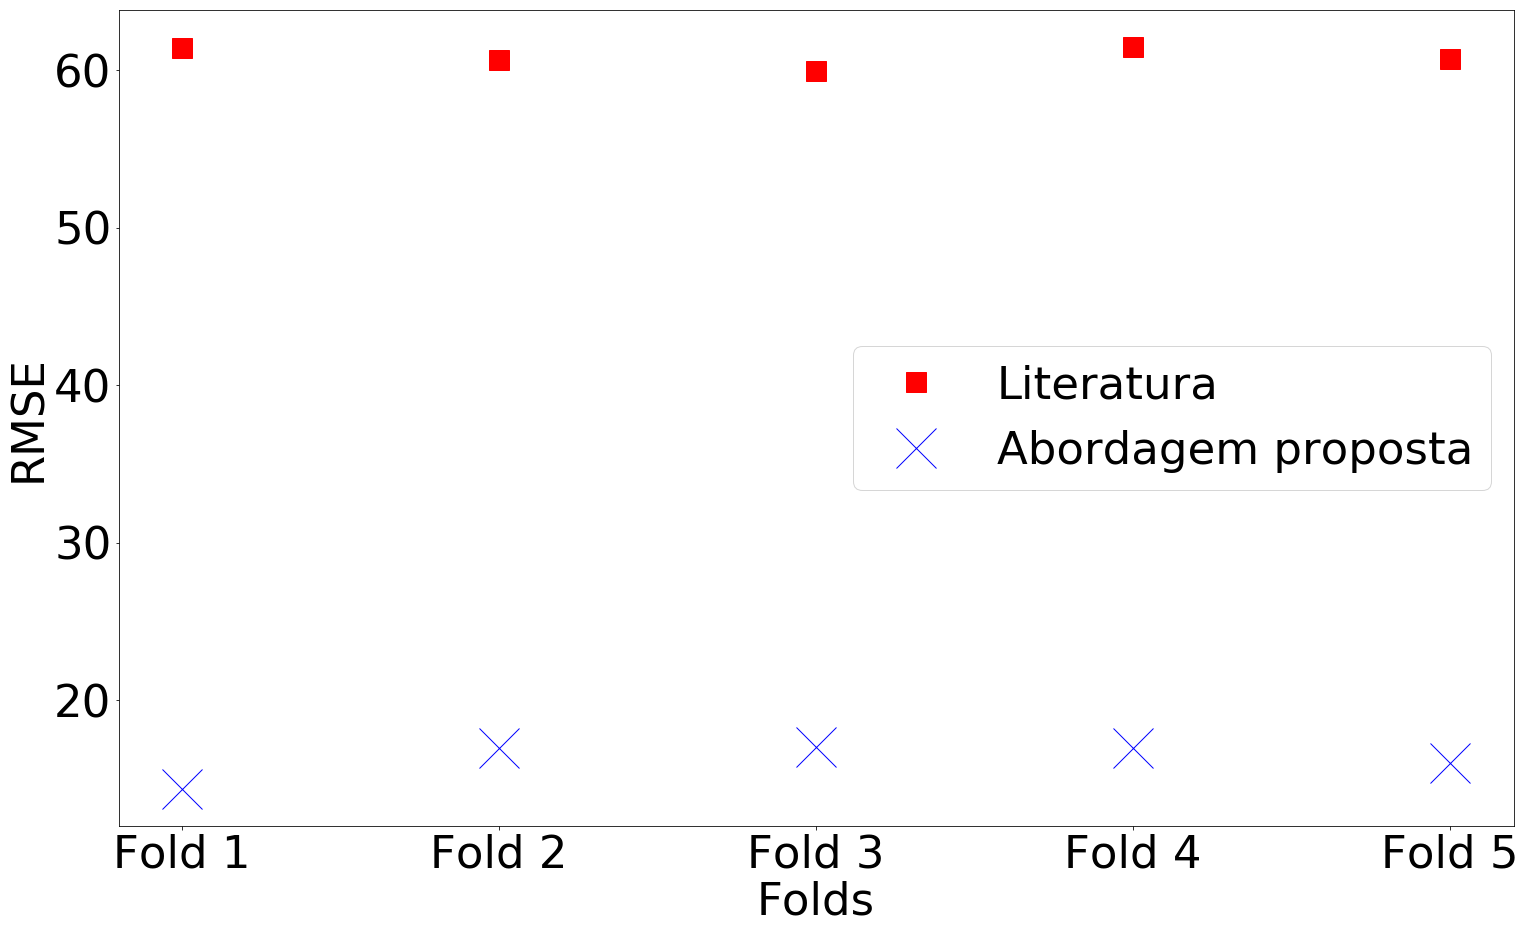

In [67]:
fold_graph(lit_rmse, rf_rmse, 'firmeza', 'RMSE')

<span style="font-size:20px">Dispersion graphs</span>

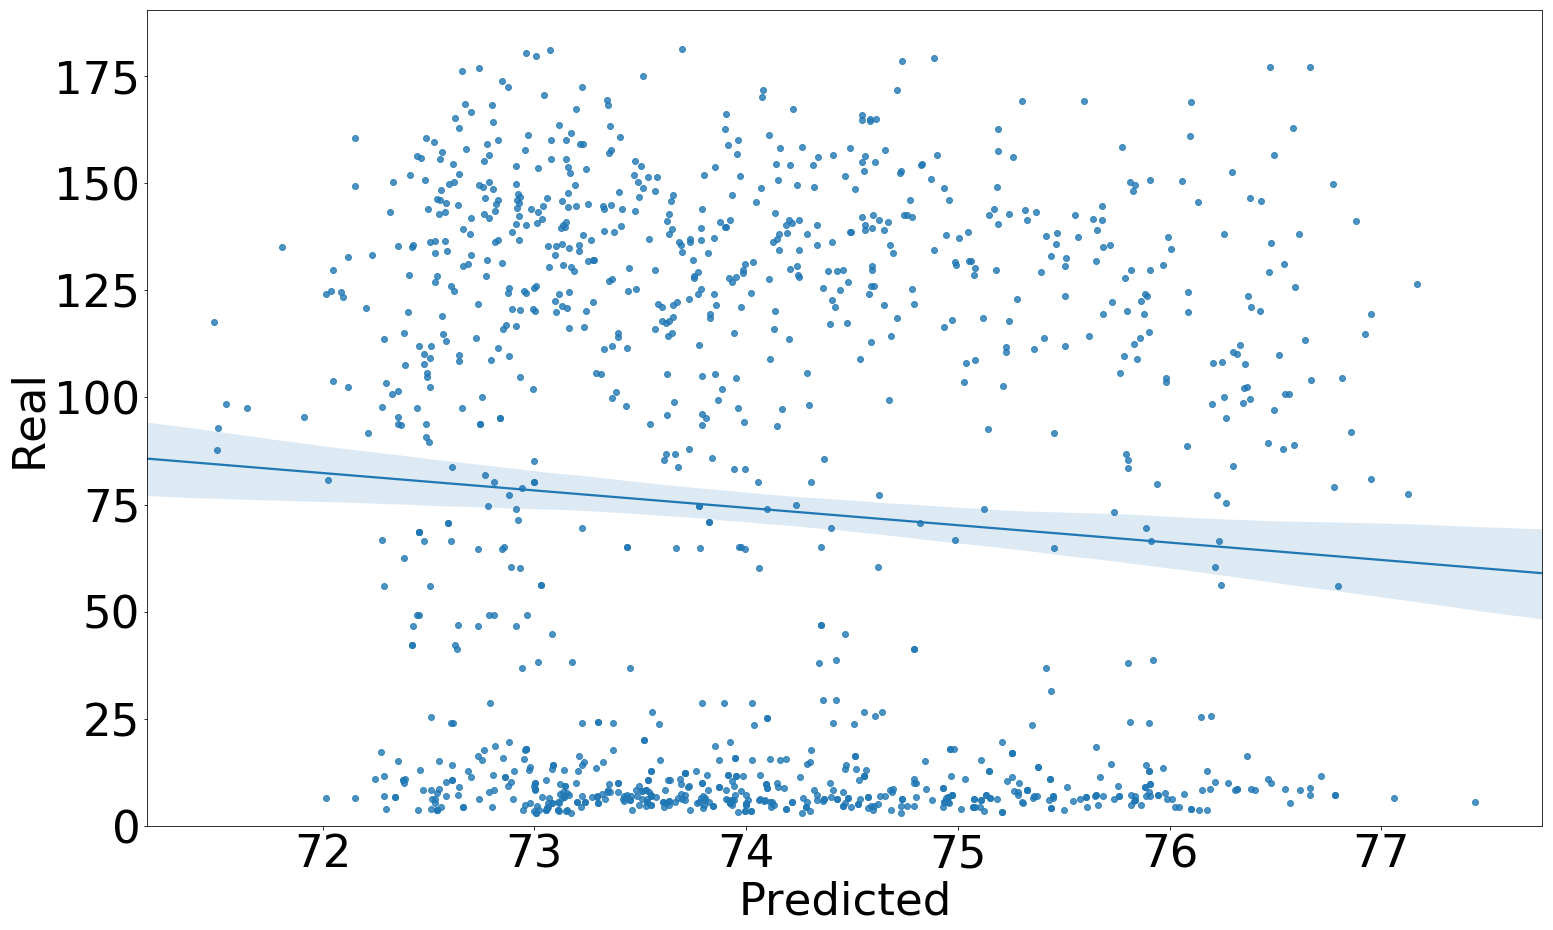

In [69]:
rgb_pred = pd.read_csv('../predictions/dados_predict_reais_L_mean.csv', index_col=0, sep=';')
dispersion_graph(rgb_pred, 'firmeza', 'Lmean')

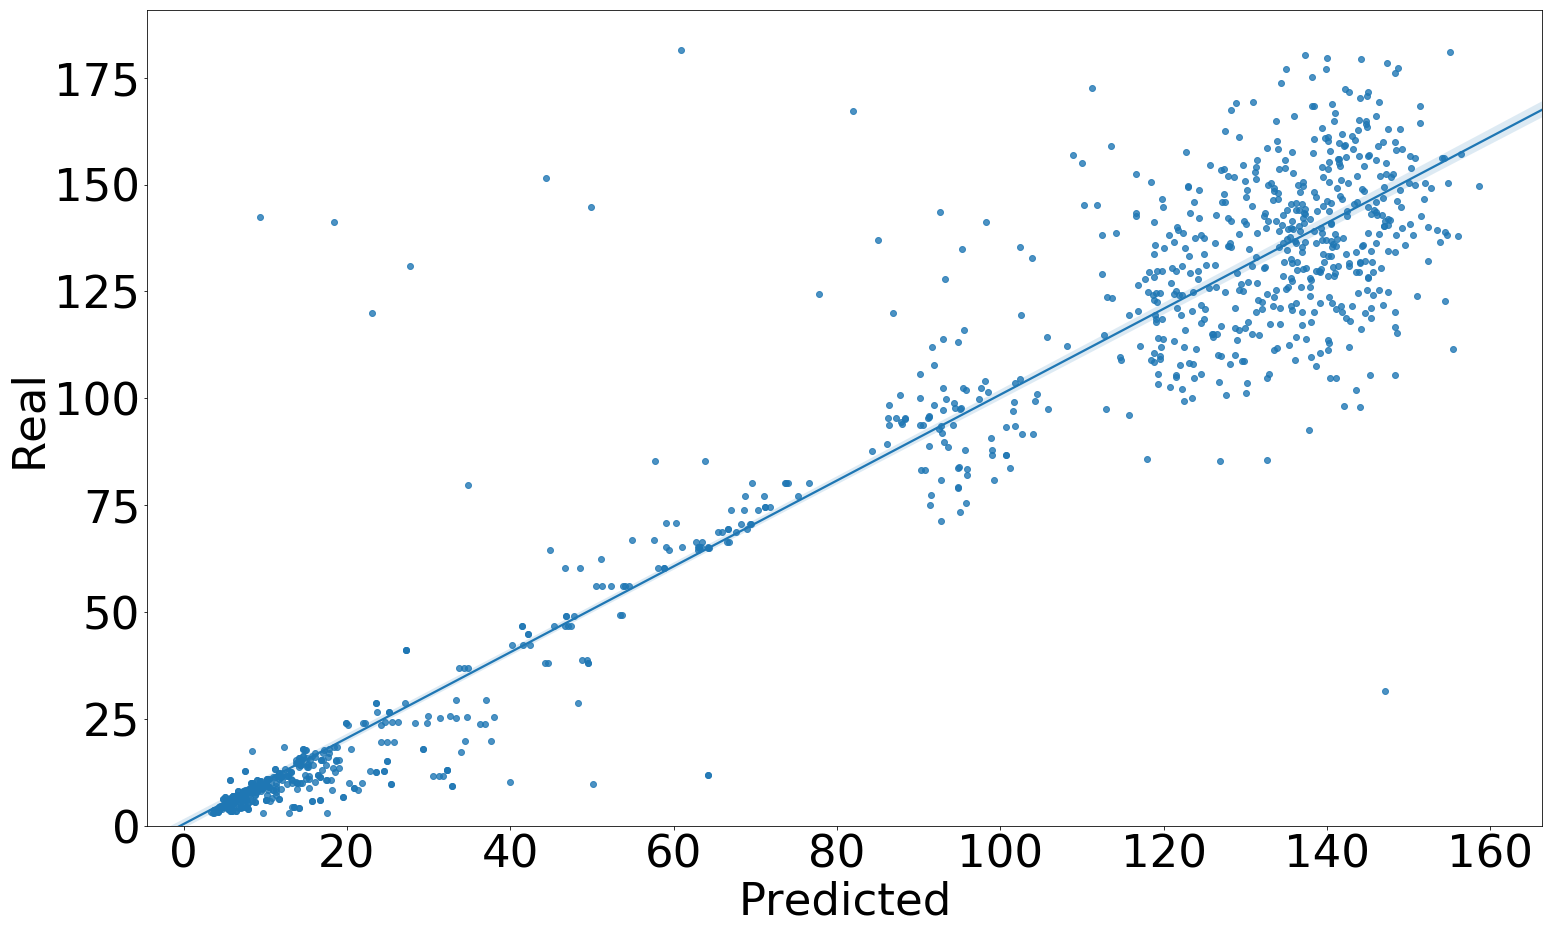

In [70]:
dispersion_graph(pred, 'firmeza', '8_best')

# acidity prediction ( L mean (LR) x 8 best variables (RF)

In [71]:
lit_r2 = pd.read_csv('../results/literatura_acidez_r2.csv', index_col=0)
lit_rmse = pd.read_csv('../results/literatura_acidez_rmse.csv', index_col=0)

rf_r2 = pd.read_csv('../results/rf8best_acidez_r2.csv', index_col=0)
rf_rmse = pd.read_csv('../results/rf8best_acidez_rmse.csv', index_col=0)

In [72]:
lit_r2['MLR'] = lit_r2['MLR'].apply(lambda x: math.sqrt(x))
rf_r2['RF100'] = rf_r2['RF100'].apply(lambda x: math.sqrt(x))

<span style="font-size:20px">R values by fold</span>

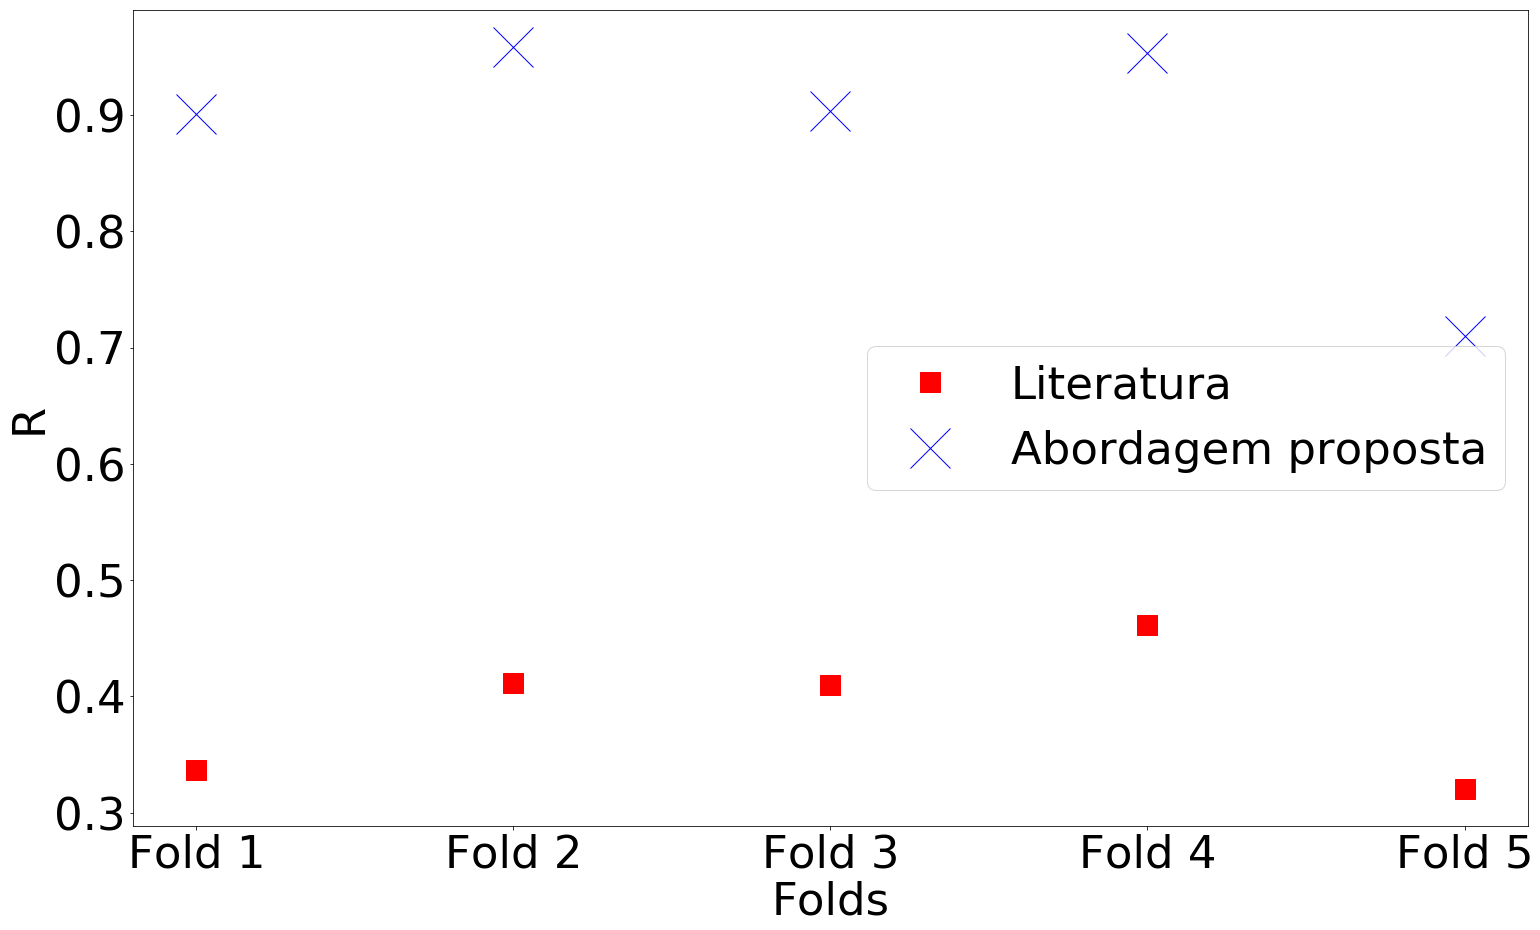

In [73]:
fold_graph(lit_r2, rf_r2, 'acidez', 'R')

<span style="font-size:20px">RMSE values by fold</span>

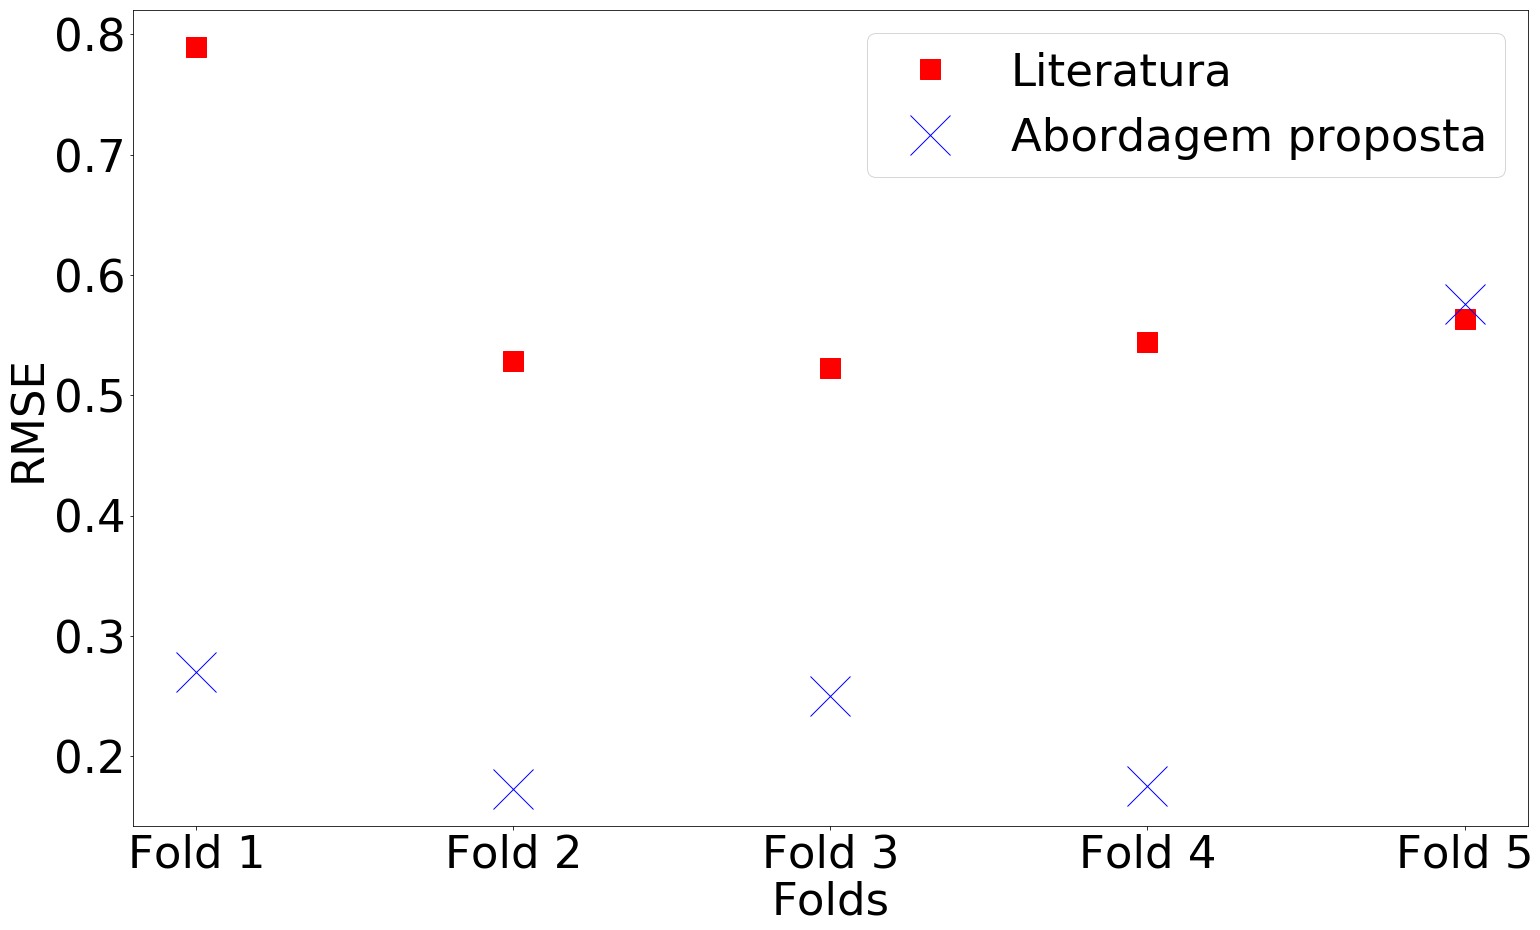

In [74]:
fold_graph(lit_rmse, rf_rmse, 'acidez', 'RMSE')

<span style="font-size:20px">Dispersion graphs</span>

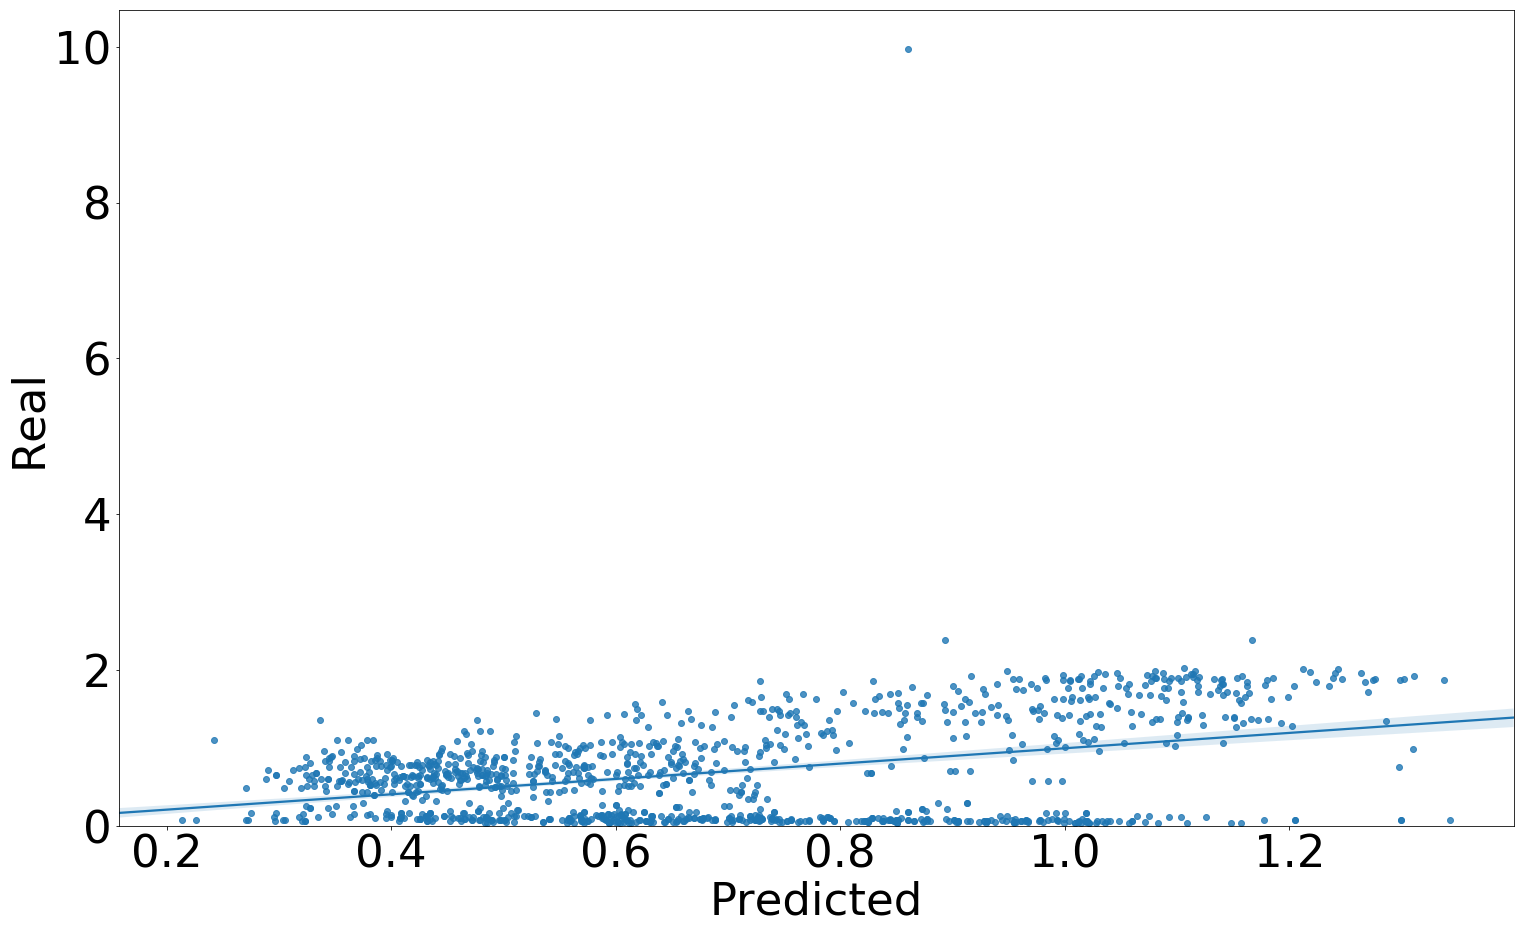

In [75]:
rgb_pred = pd.read_csv('../predictions/dados_predict_reais_L_mean.csv', index_col=0, sep=';')
dispersion_graph(rgb_pred, 'acidez', 'Lmean')

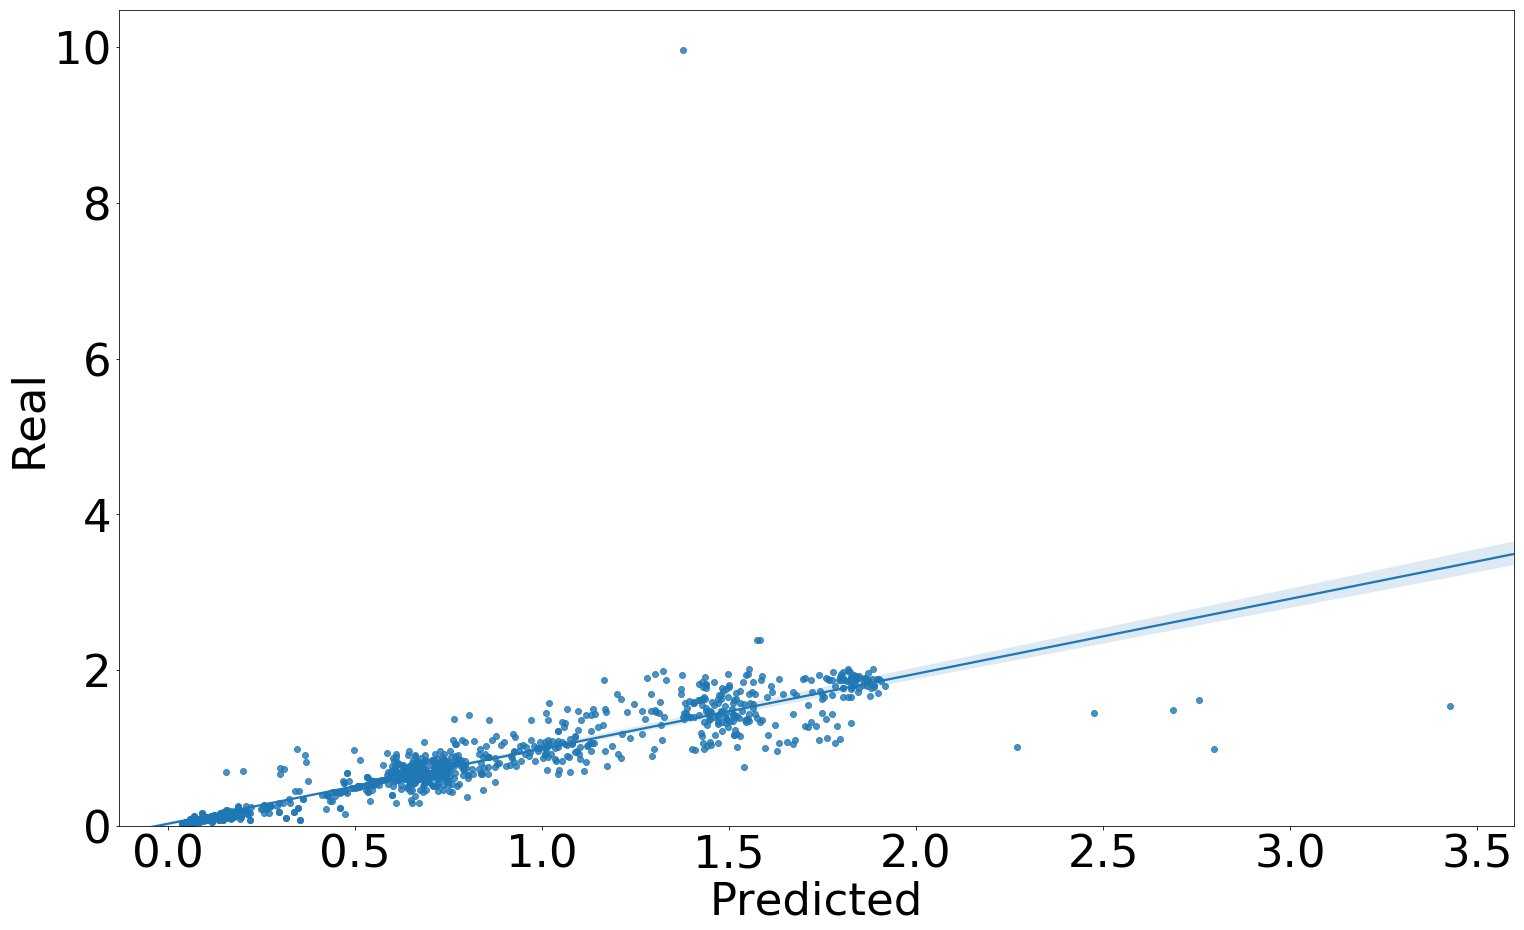

In [76]:
dispersion_graph(pred, 'acidez', '8_best')

In [7]:
pred.columns[6:]

Index(['sst_real', 'firmeza_real', 'time_real', 'acidez_real', 'massa_real',
       'ratio_real'],
      dtype='object')

In [16]:
pred[pred['acidez_real'] > 9]

sst_predict  firmeza_predict  time_predict  \
0529palmer_sem5_num25        5.479          143.486         94.55   

                       massa_predict  ratio_predict  acidez_predict  sst_real  \
0529palmer_sem5_num25       497.8583        4.68956        1.284055       5.4   

                       firmeza_real  time_real  acidez_real  massa_real  \
0529palmer_sem5_num25        141.05       95.0     9.970144      514.57   

                       ratio_real  
0529palmer_sem5_num25    0.541617

In [35]:
att = 'sst_real'

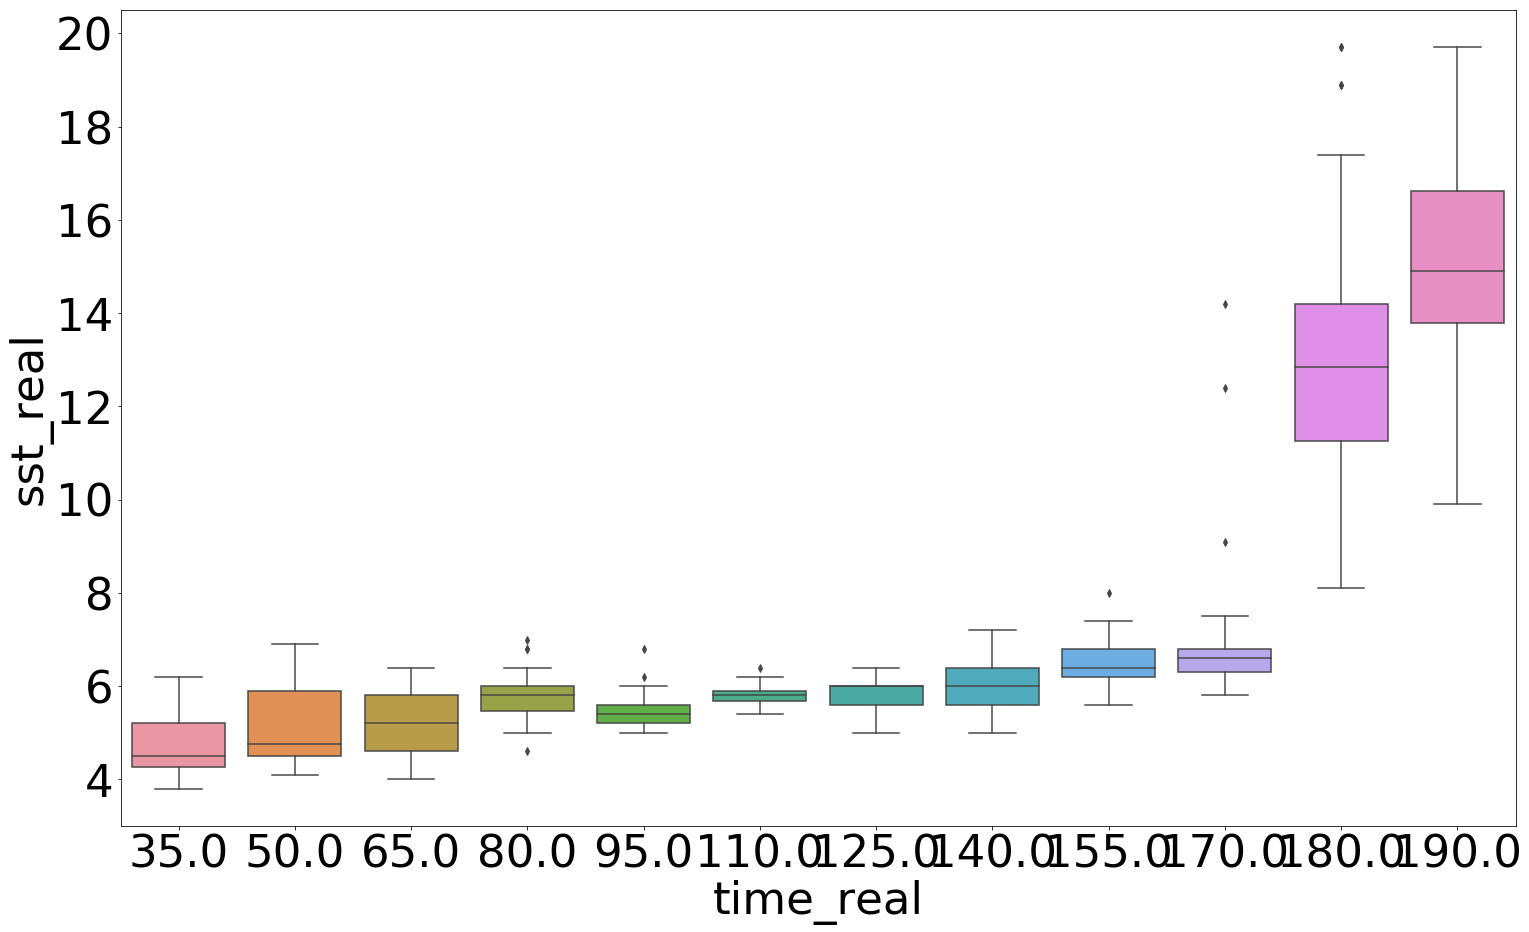

In [36]:
ax = sns.boxplot(x='time_real', y=att, data=pred.drop('0529palmer_sem5_num25'))
# ax.set(xlabel='Tempo', ylabel=atts[i], title='Variação do atributo ' + atts[i] + ' para Tommy', ylim=(-0.03, -0.019))
ax.get_figure().savefig('../plots/atributos/boxplot_%s.png' % att)